In [820]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import pickle

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [821]:
scaler = MinMaxScaler()
distance_from_basket = np.array([random.uniform(15, 23) for i in range(0, 2000)])
scaled_distance_from_basket = scaler.fit_transform(distance_from_basket.reshape(-1,1))
shot_made_by_distance = []
for i in range(0, len(scaled_distance_from_basket)):
    x_value = scaled_distance_from_basket[i][0]
    p_shot_made = np.exp(-x_value / 3) - 0.3
    p_shot_not_made = 1 - p_shot_made
    y_value = np.random.choice([1, 0], p=[p_shot_made, p_shot_not_made])
    shot_made_by_distance.append(y_value)

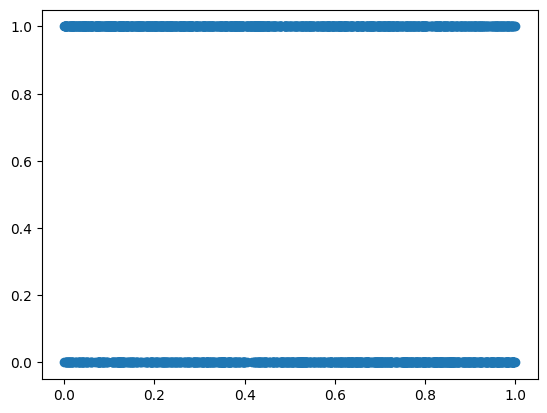

In [822]:
plt.scatter(scaled_distance_from_basket, shot_made_by_distance)

In [823]:
player_ability = np.array([random.uniform(0, 100) for i in range(0, 2000)])
scaled_player_ability = scaler.fit_transform(player_ability.reshape(-1,1))
shot_made_by_ability = []
for i in range(0, len(scaled_player_ability)):
    x_value = scaled_player_ability[i][0]
    p_shot_made = (np.exp(5 * x_value) - 0) / (155 - 0)
    p_shot_not_made = 1 - p_shot_made
    y_value = np.random.choice([1, 0], p=[p_shot_made, p_shot_not_made])
    shot_made_by_ability.append(y_value)

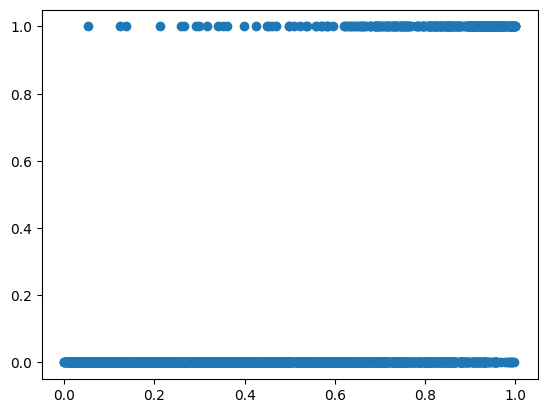

In [824]:
plt.scatter(scaled_player_ability, shot_made_by_ability)

In [825]:
player_energy = np.array([random.uniform(0, 100) for i in range(0, 2000)])
scaled_player_energy = scaler.fit_transform(player_energy.reshape(-1,1))
shot_made_by_energy = []
for i in range(0, len(scaled_player_energy)):
    x_value = scaled_player_energy[i][0]
    p_shot_made = np.exp(x_value / 5) - 0.8
    p_shot_not_made = 1 - p_shot_made
    y_value = np.random.choice([1, 0], p=[p_shot_made, p_shot_not_made])
    shot_made_by_energy.append(y_value)

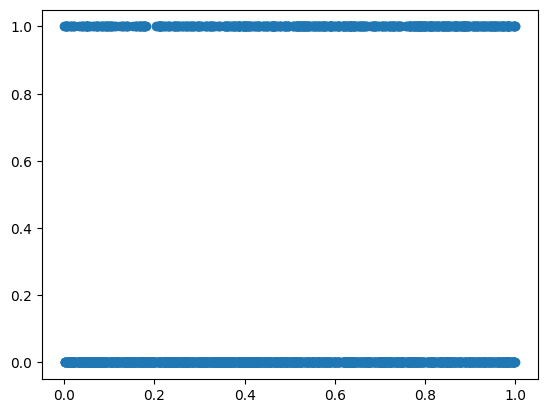

In [826]:
plt.scatter(scaled_player_energy, shot_made_by_energy)

In [827]:
shot_quality = np.array([random.uniform(0, 100) for i in range(0, 2000)])
scaled_shot_quality = scaler.fit_transform(shot_quality.reshape(-1,1))
shot_made_by_shot_quality = []
for i in range(0, len(scaled_shot_quality)):
    x_value = scaled_shot_quality[i][0]
    p_shot_made = (np.exp(5 * x_value) - 0) / (155 - 0)
    p_shot_not_made = 1 - p_shot_made
    y_value = np.random.choice([1, 0], p=[p_shot_made, p_shot_not_made])
    shot_made_by_shot_quality.append(y_value)

In [828]:
mid_range_dataframe = pd.DataFrame({'scaled_distance_from_basket' : [scaled_distance_from_basket[i][0] for i in range(0, len(scaled_distance_from_basket))],
            'scaled_player_ability' : [scaled_player_ability[i][0] for i in range(0, len(scaled_player_ability))],
            'scaled_player_energy' : [scaled_player_energy[i][0] for i in range(0, len(scaled_player_energy))],
            'scaled_shot_quality' : [scaled_shot_quality[i][0] for i in range(0, len(scaled_shot_quality))],
            'shot_made_by_distance' : shot_made_by_distance,
            'shot_made_by_ability' : shot_made_by_ability,
            'shot_made_by_energy' : shot_made_by_energy,
            'shot_made_by_shot_quality' : shot_made_by_shot_quality
})

In [829]:
mid_range_dataframe.dtypes

scaled_distance_from_basket    float64
scaled_player_ability          float64
scaled_player_energy           float64
scaled_shot_quality            float64
shot_made_by_distance            int64
shot_made_by_ability             int64
shot_made_by_energy              int64
shot_made_by_shot_quality        int64
dtype: object

In [830]:
def determine_if_shot_made(value):
    if value >= 0.5:
        return 1
    else:
        return 0

mid_range_dataframe['shot_made_overall'] = mid_range_dataframe[['shot_made_by_distance', 'shot_made_by_ability', 'shot_made_by_energy', 'shot_made_by_shot_quality']]\
.apply(lambda x: np.mean(x), axis=1)
mid_range_dataframe['shot_made_overall'] = mid_range_dataframe['shot_made_overall'].apply(determine_if_shot_made)

In [831]:
mid_range_dataframe

,scaled_distance_from_basket,scaled_player_ability,scaled_player_energy,scaled_shot_quality,shot_made_by_distance,shot_made_by_ability,shot_made_by_energy,shot_made_by_shot_quality,shot_made_overall
0,0.702454,0.263025,0.848590,0.661762,0,0,0,0,0
1,0.865948,0.576263,0.847623,0.154250,0,0,0,0,0
2,0.518249,0.093164,0.948397,0.358889,1,0,0,0,0
3,0.603854,0.351968,0.222995,0.278801,1,0,0,0,0
4,0.649559,0.643797,0.983304,0.790291,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1995,0.660542,0.121088,0.620881,0.110456,1,0,1,0,1
1996,0.238891,0.274797,0.327610,0.192921,1,0,0,0,0
1997,0.468517,0.175933,0.159705,0.258818,0,0,0,1,0
1998,0.963028,0.893729,0.763182,0.168263,1,0,0,0,0


In [832]:
input_features = mid_range_dataframe[['scaled_distance_from_basket', 'scaled_player_ability', 'scaled_player_energy', 'scaled_shot_quality']]
shot_made_overall = mid_range_dataframe['shot_made_overall']

X_train, X_test, y_train, y_test = train_test_split(input_features, shot_made_overall)

model = LogisticRegression().fit(X_train, y_train)

In [863]:
player_distance = 20
player_ability = 92
player_energy = 50
player_shot_quality = 60

scaled_player_distance = (player_distance - 15) / (23 - 15)
scaled_player_ability = (player_ability - 0) / (100 - 0)
scaled_player_energy = (player_energy - 0) / (100 - 0)
scaled_shot_quality = (player_shot_quality - 0) / (100 - 0)

In [864]:
model.predict_proba(np.array([[scaled_player_distance, scaled_player_ability, scaled_player_energy, scaled_shot_quality]]))

/home/gbanys/micromamba/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.48088477, 0.51911523]])

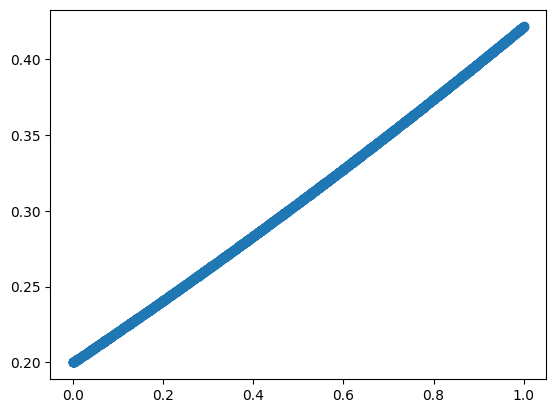

In [819]:
plt.scatter(scaled_player_energy, np.exp(scaled_player_energy / 5) - 0.8)

In [639]:
model.score(X_test, y_test)

0.792

In [594]:
pickled_model = pickle.load(open('mid_range_model.pkl', 'rb'))

In [598]:
pickled_model.predict_proba(np.array([[scaled_player_distance, scaled_player_ability, scaled_player_energy]]))

/home/gbanys/micromamba/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.55058653, 0.44941347]])

In [599]:
pickled_model.score(input_features, shot_made_overall)

0.655